In [2]:
import torch

In [3]:
# setting device on GPU if available, else CPU
#device = torch.device(‘cuda’ if torch.cuda.is_available() else ‘cpu’)
device = torch.device("cuda")
print("Using device:", device)
print()
#Additional Info when using cuda
if device.type == "cuda":
 print(torch.cuda.get_device_name(0))
 print("Memory Usage:")
 print("Allocated:", round(torch.cuda.memory_allocated(0)/1024**3,1), "GB")
 print("Cached: ", round(torch.cuda.memory_reserved(0)/1024**3,1), "GB")

Using device: cuda

NVIDIA GeForce GTX 1050 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:  0.0 GB


In [4]:
if torch.cuda.is_available():
    device=torch.device("cuda:0")
    print("Training on GPU... Ready for HyperJump...")
else:
    device = torch.device("cpu")
    print("Training on CPU... May the force be with you...")

Training on GPU... Ready for HyperJump...


In [5]:
torch.cuda.is_available()

True

In [2]:
import pandas as pd
import os

# Load the uploaded CSV file
file_path = 'dataset_sdn.csv'

if os.path.exists(file_path) :
    print("Dosya bulundu")

else :
    print( "Dosya bulunamadı") 
    
dataset = pd.read_csv(file_path)

# Display basic information about the dataset
dataset_info = {
    "columns": dataset.columns.tolist(),
    "shape": dataset.shape,
    "missing_values": dataset.isnull().sum().sum(),
    "sample_data": dataset.head().to_dict()
}

dataset_info


Dosya bulundu


{'columns': ['dt',
  'switch',
  'src',
  'dst',
  'pktcount',
  'bytecount',
  'dur',
  'dur_nsec',
  'tot_dur',
  'flows',
  'packetins',
  'pktperflow',
  'byteperflow',
  'pktrate',
  'Pairflow',
  'Protocol',
  'port_no',
  'tx_bytes',
  'rx_bytes',
  'tx_kbps',
  'rx_kbps',
  'tot_kbps',
  'label'],
 'shape': (104345, 23),
 'missing_values': 1012,
 'sample_data': {'dt': {0: 11425, 1: 11605, 2: 11425, 3: 11425, 4: 11425},
  'switch': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
  'src': {0: '10.0.0.1',
   1: '10.0.0.1',
   2: '10.0.0.2',
   3: '10.0.0.2',
   4: '10.0.0.2'},
  'dst': {0: '10.0.0.8',
   1: '10.0.0.8',
   2: '10.0.0.8',
   3: '10.0.0.8',
   4: '10.0.0.8'},
  'pktcount': {0: 45304, 1: 126395, 2: 90333, 3: 90333, 4: 90333},
  'bytecount': {0: 48294064,
   1: 134737070,
   2: 96294978,
   3: 96294978,
   4: 96294978},
  'dur': {0: 100, 1: 280, 2: 200, 3: 200, 4: 200},
  'dur_nsec': {0: 716000000,
   1: 734000000,
   2: 744000000,
   3: 744000000,
   4: 744000000},
  'tot_dur': {0: 1

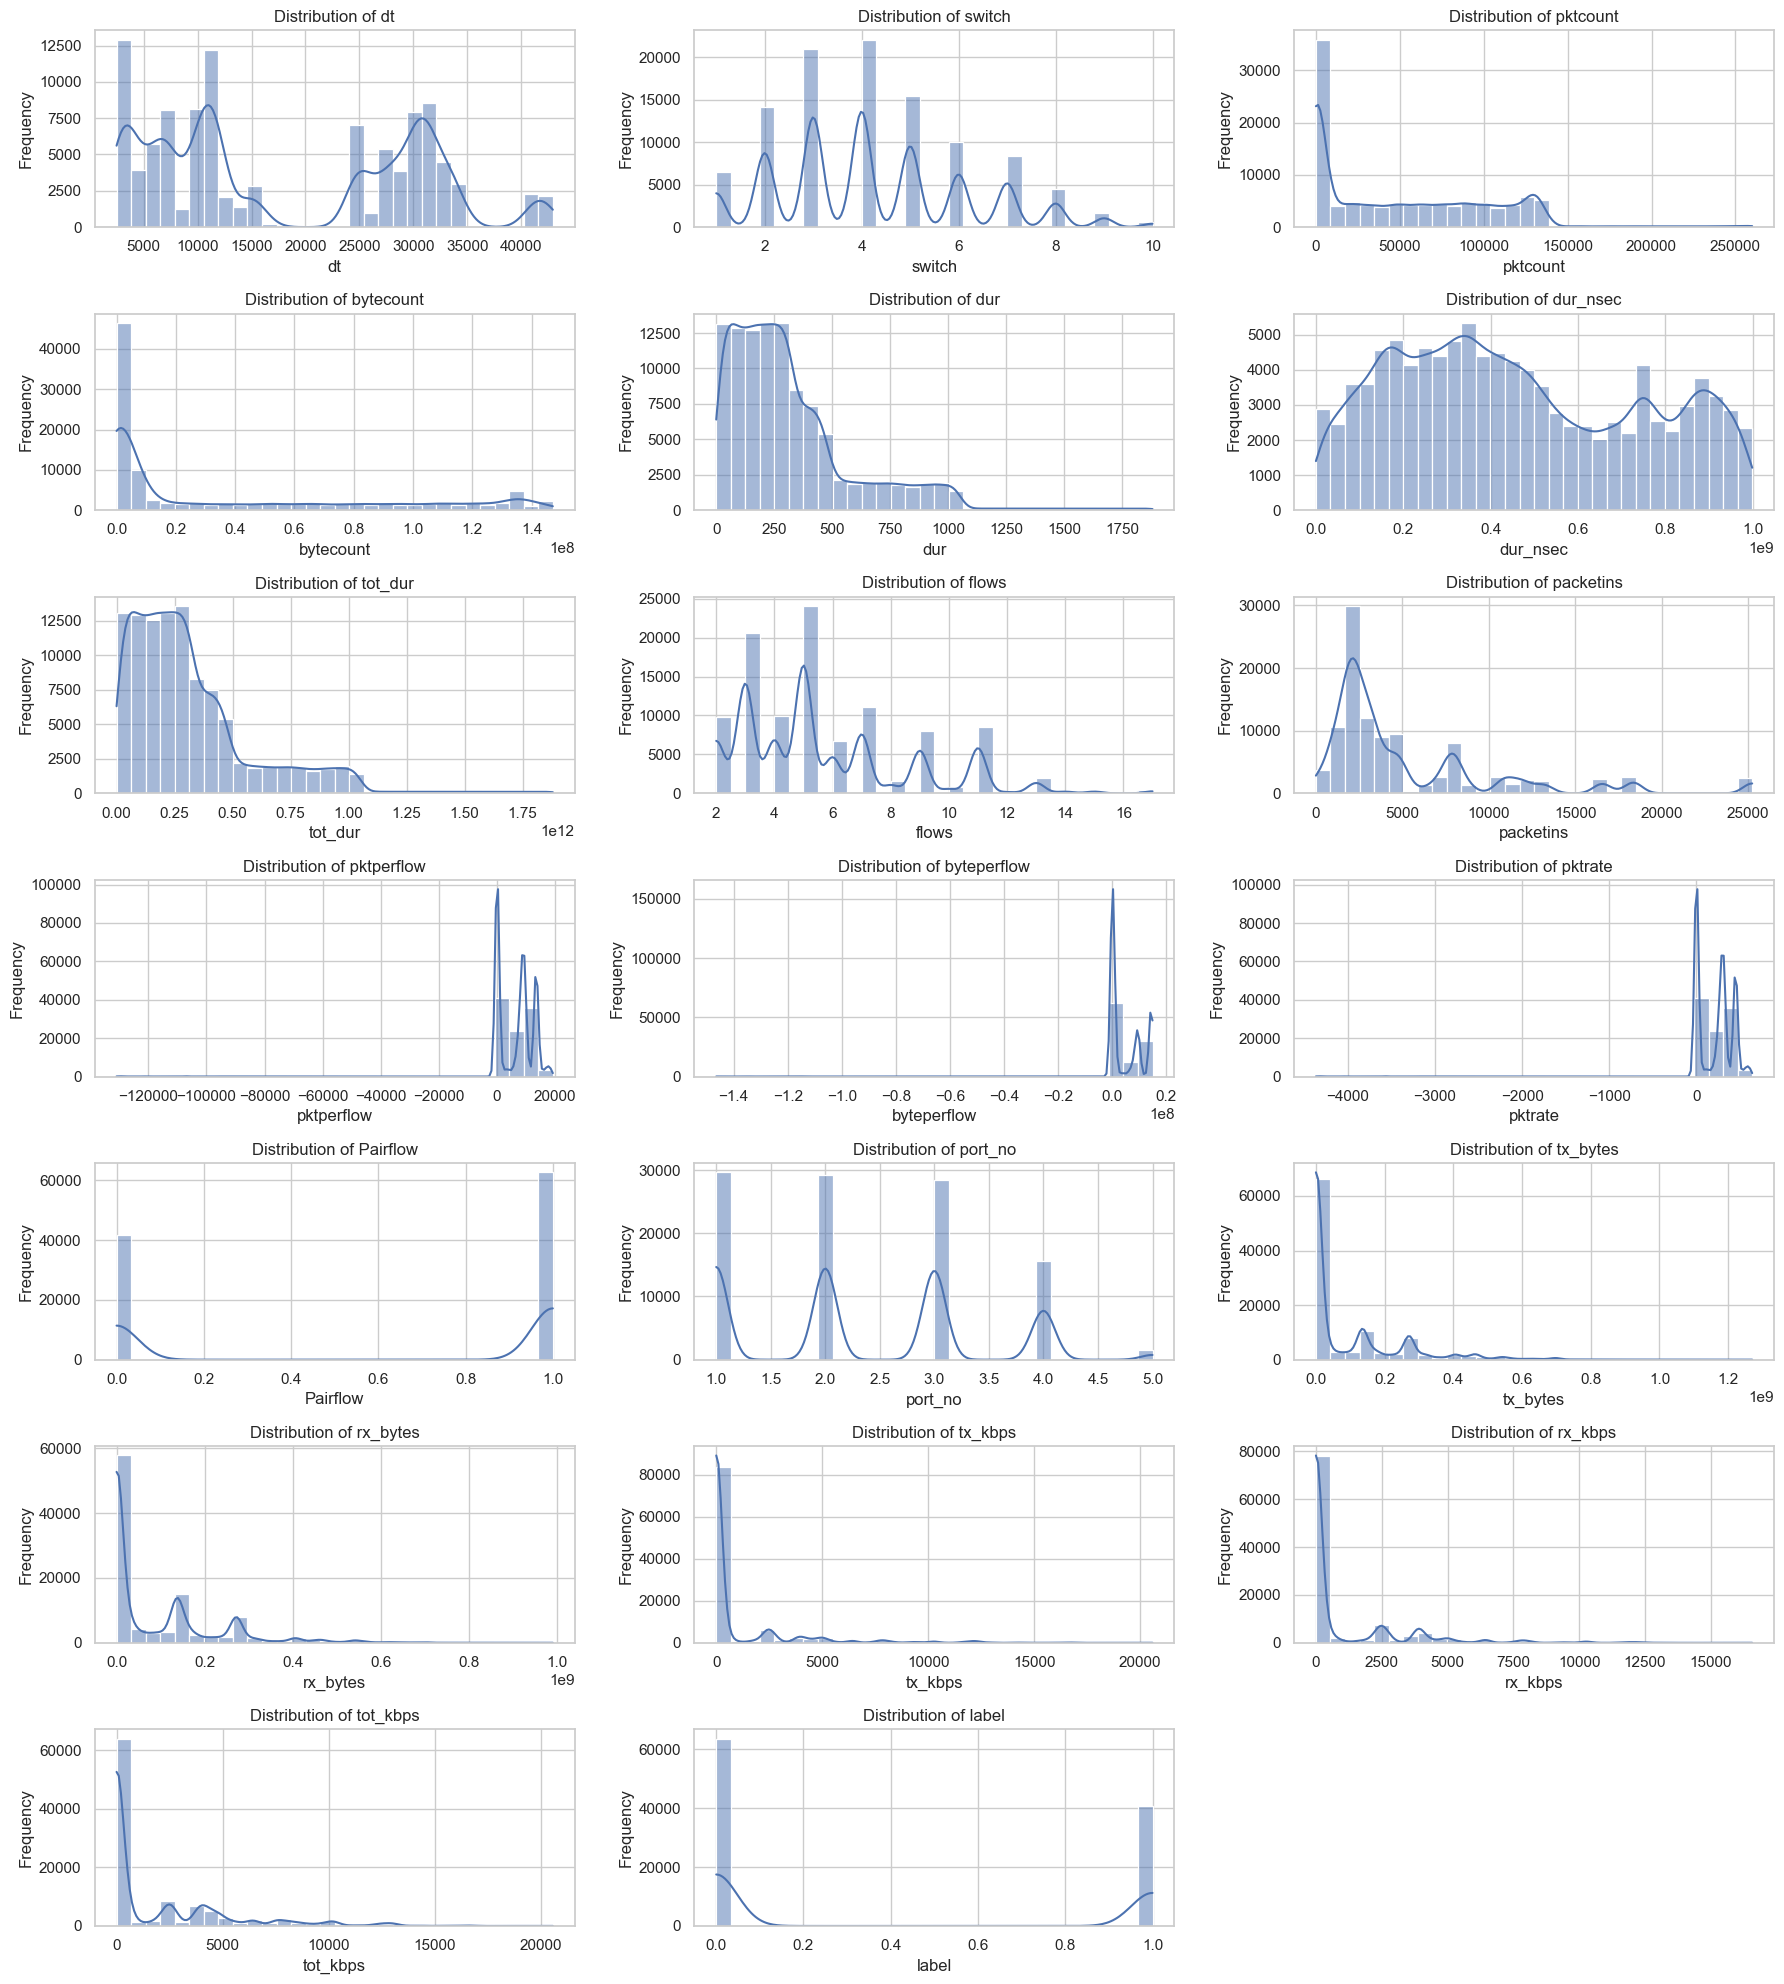

C:\Users\apoth\AppData\Local\Temp\ipykernel_2604\2944044422.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=dataset, palette="viridis")


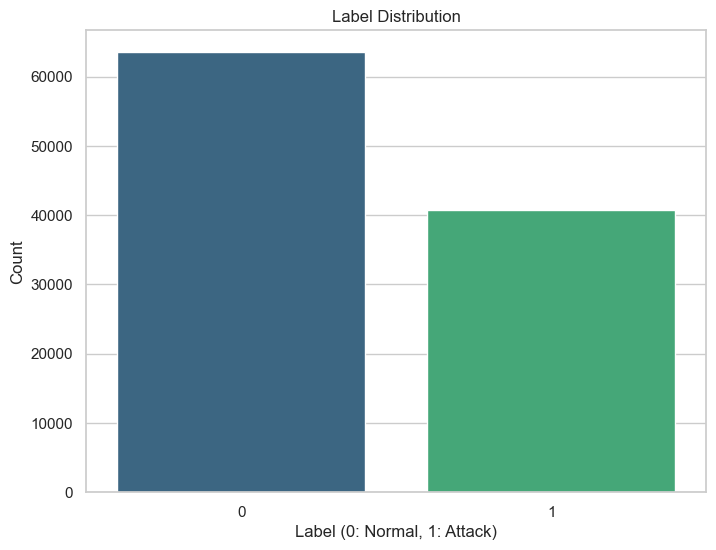

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns



# Set a style for the plots
sns.set(style="whitegrid")

# Select numeric columns for histogram visualization
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numeric columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(18, 20))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(dataset[column].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Visualize label distribution (0: Normal, 1: Attack)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=dataset, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Label (0: Normal, 1: Attack)")
plt.ylabel("Count")
plt.show()

In [5]:
# Eksik verileri doldurma


# Check for missing values again to confirm the count
missing_values = dataset.isnull().sum()

# Handle missing values: Fill numeric columns with median and drop rows with missing categorical data
for column in dataset.columns:
    if dataset[column].dtype in ['float64', 'int64']:
        dataset[column].fillna(dataset[column].median(), inplace=True)
    else:
        dataset.dropna(subset=[column], inplace=True)

# Verify there are no more missing values
remaining_missing_values = dataset.isnull().sum().sum()

remaining_missing_values


C:\Users\apoth\AppData\Local\Temp\ipykernel_2604\895607356.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].median(), inplace=True)
C:\Users\apoth\AppData\Local\Temp\ipykernel_2604\895607356.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

0

In [8]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Initialize a scaler for normalization
scaler = MinMaxScaler()

# Normalize numeric columns
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# One-hot encode categorical columns (e.g., 'Protocol')
categorical_columns = dataset.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid dummy variable trap

# Apply one-hot encoding and update dataset
encoded_cats = pd.DataFrame(encoder.fit_transform(dataset[categorical_columns]),
                            columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and merge with encoded data
dataset = dataset.drop(columns=categorical_columns).reset_index(drop=True)
dataset = pd.concat([dataset, encoded_cats], axis=1)

# Confirm the updated dataset structure
dataset.head().to_dict(), dataset.shape


({'dt': {0: 0.22095581872573988,
   1: 0.22540608697802061,
   2: 0.22095581872573988,
   3: 0.22095581872573988,
   4: 0.22095581872573988},
  'switch': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
  'pktcount': {0: 0.17424213287385676,
   1: 0.4861233971523734,
   2: 0.34742659784774194,
   3: 0.34742659784774194,
   4: 0.34742659784774194},
  'bytecount': {0: 0.32824522418240953,
   1: 0.9157812800312479,
   2: 0.6544979656557832,
   3: 0.6544979656557832,
   4: 0.6544979656557832},
  'dur': {0: 0.053163211057947905,
   1: 0.14885699096225413,
   2: 0.10632642211589581,
   3: 0.10632642211589581,
   4: 0.10632642211589581},
  'dur_nsec': {0: 0.7167167167167168,
   1: 0.7347347347347347,
   2: 0.7447447447447447,
   3: 0.7447447447447447,
   4: 0.7447447447447447},
  'tot_dur': {0: 0.05372340425531916,
   1: 0.149468085106383,
   2: 0.10691489361702129,
   3: 0.10691489361702129,
   4: 0.10691489361702129},
  'flows': {0: 0.06666666666666668,
   1: 0.0,
   2: 0.06666666666666668,
   3: 

In [9]:
# Separate features (X) and labels (y)
X = dataset.drop(columns=['label'])  # Drop the label column from features
y = dataset['label']  # Only the label column

# Convert to numpy arrays for PyTorch compatibility
X = X.values
y = y.values

# Check the shape of X and y
X.shape, y.shape


((104345, 56), (104345,))

In [10]:
import torch
import torch.nn as nn

# Define the Generator model
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()  # To output values between -1 and 1
        )

    def forward(self, x):
        return self.model(x)


# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, x):
        return self.model(x)


# Set dimensions for input and output
latent_dim = 100  # Dimension of the noise vector (input to the generator)
input_dim = X.shape[1]  # Number of features in the dataset

# Initialize the models
generator = Generator(input_dim=latent_dim, output_dim=input_dim)
discriminator = Discriminator(input_dim=input_dim)

# Check the models' architecture
generator, discriminator


(Generator(
   (model): Sequential(
     (0): Linear(in_features=100, out_features=128, bias=True)
     (1): ReLU()
     (2): Linear(in_features=128, out_features=256, bias=True)
     (3): ReLU()
     (4): Linear(in_features=256, out_features=56, bias=True)
     (5): Tanh()
   )
 ),
 Discriminator(
   (model): Sequential(
     (0): Linear(in_features=56, out_features=256, bias=True)
     (1): LeakyReLU(negative_slope=0.2)
     (2): Linear(in_features=256, out_features=128, bias=True)
     (3): LeakyReLU(negative_slope=0.2)
     (4): Linear(in_features=128, out_features=1, bias=True)
     (5): Sigmoid()
   )
 ))

In [13]:
# Define loss function
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

# Optimizers for generator and discriminator
lr = 0.0002  # Learning rate
beta1 = 0.5  # Beta1 for Adam optimizer

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

# Confirm setup
device, optimizer_G, optimizer_D


(device(type='cuda'),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.5, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0002
     maximize: False
     weight_decay: 0
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.5, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0002
     maximize: False
     weight_decay: 0
 ))

In [14]:
# Training settings
epochs = 1000  # Number of epochs
batch_size = 128  # Batch size

# Create DataLoader for the dataset
from torch.utils.data import DataLoader, TensorDataset

# Convert dataset to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

# DataLoader for batching
dataloader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=batch_size, shuffle=True)

# Function to generate noise vectors for the generator
def generate_noise(batch_size, noise_dim, device):
    return torch.randn(batch_size, noise_dim, device=device)

# Start training loop setup
real_label = 1.0  # Label for real data
fake_label = 0.0  # Label for fake data



loss_D_list = []
loss_G_list = []


# Training loop
for epoch in range(epochs):
    
    
    for real_data, _ in dataloader:
        
        batch_size = real_data.size(0)

        # Train Discriminator
        # ------------------
        # Real data
        real_labels = torch.full((batch_size, 1), real_label, dtype=torch.float, device=device)
        output_real = discriminator(real_data)
        loss_real = criterion(output_real, real_labels)

        # Fake data
        noise = generate_noise(batch_size, latent_dim, device)
        fake_data = generator(noise)
        fake_labels = torch.full((batch_size, 1), fake_label, dtype=torch.float, device=device)
        output_fake = discriminator(fake_data.detach())
        loss_fake = criterion(output_fake, fake_labels)

        # Total discriminator loss
        loss_D = loss_real + loss_fake

        # Update Discriminator
        optimizer_D.zero_grad()
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        # ----------------
        # Generate fake data and try to fool the discriminator
        output = discriminator(fake_data)
        loss_G = criterion(output, real_labels)

        # Update Generator
        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

        # Kayıpları kaydetme
        loss_D_list.append(loss_D.item())
        loss_G_list.append(loss_G.item())

    # Log progress
    if (epoch ) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss_D: {loss_D.item():.4f}, Loss_G: {loss_G.item():.4f}")

# Training completed
print ( "Training completed." )



# Eğitim bittikten sonra grafiği çizdirme
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_D_list) + 1), loss_D_list, label="D_loss", color="blue", alpha=0.7)
plt.plot(range(1, len(loss_G_list) + 1), loss_G_list, label="G_loss", color="orange", alpha=0.7)
plt.title("Discriminator ve Generator Loss Grafiği")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Training started.
Epoch [1/1000], Loss_D: 0.0930, Loss_G: 3.4897
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.
Training started.

Sentetik veri synthetic_data.csv dosyasına kaydedildi.


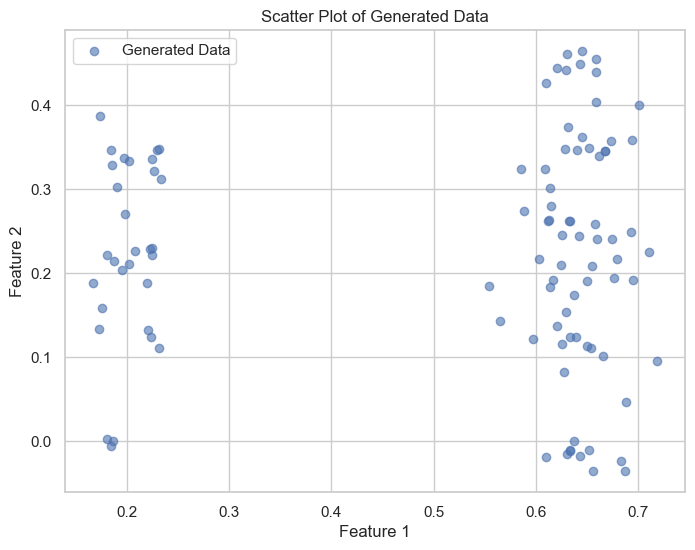

In [16]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

# 1. Sentetik Veri Üretme
latent_dim = 100  # Daha önce tanımlanan latent vektör boyutu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Noise oluştur ve sentetik veri üret
generator.eval()  # Modeli değerlendirme moduna geçir
noise = torch.randn(100, latent_dim).to(device)  # 100 sentetik örnek için rastgele gürültü
generated_data = generator(noise).detach().cpu().numpy()

# 2. CSV Dosyasına Kaydetme
output_file = "synthetic_data.csv"
pd.DataFrame(generated_data).to_csv(output_file, index=False)
print(f"Sentetik veri {output_file} dosyasına kaydedildi.")

# 3. Görselleştirme
# İlk iki özelliği scatter plot olarak görselleştir
plt.figure(figsize=(8, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.6, label="Generated Data")
plt.title("Scatter Plot of Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


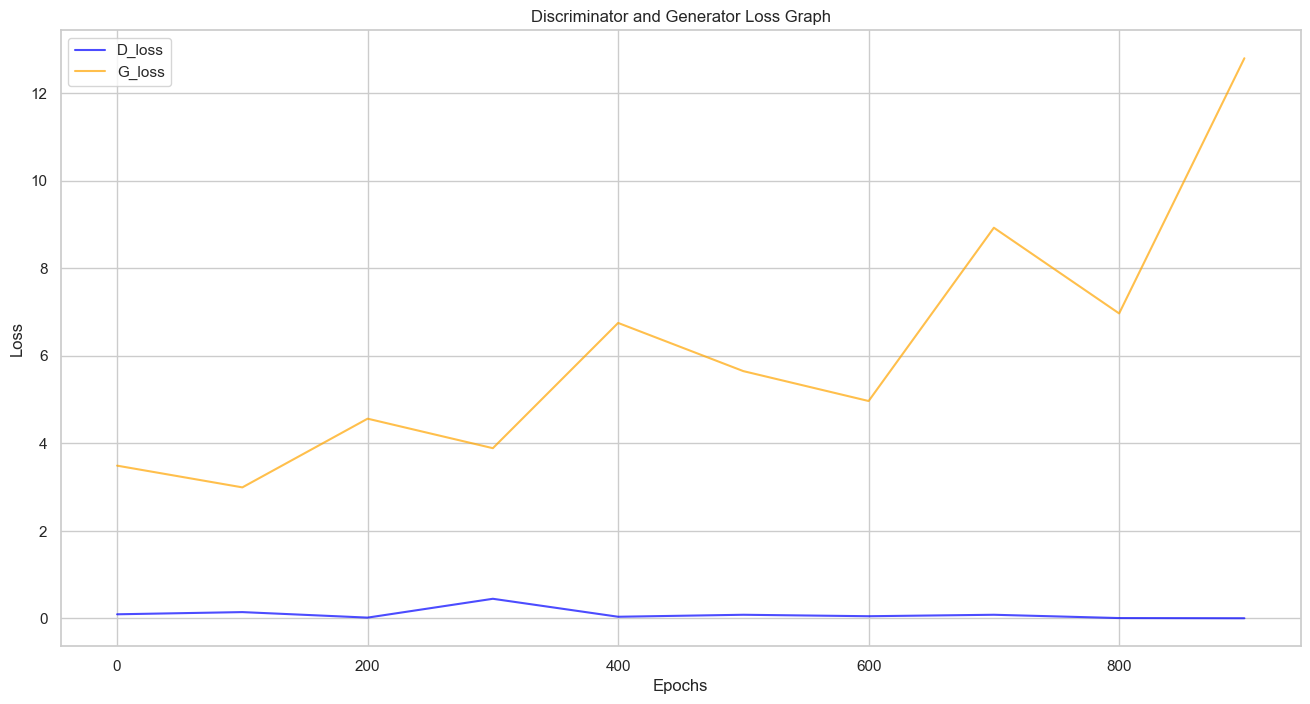

In [42]:
# Manuel olarak loss fonksiyonların değişimi
import matplotlib.pyplot as plt

# Eğitim sırasında kaydedilen kayıplar (örnek veriler, kendi değerlerinizi kullanın)
# loss_D ve loss_G değerlerini eğitim sırasında bir listeye eklemelisiniz
loss_D = [0.0930, 0.1430, 0.0171, 0.4474, 0.0368,  0.0822, 0.0489, 0.0822 , 0.0068 , 0.0025 ]  # Discriminator kayıpları
loss_G = [3.4897, 2.9933 , 4.5632 , 3.8888 , 6.7511 , 5.6497 , 4.9668 , 8.9266, 6.9682 ,12.7997]  # Generator kayıpları
epochs = [0, 100, 200 , 300 , 400 , 500 , 600 , 700 , 800, 900 ]

# Grafik oluşturma
plt.figure(figsize=(16, 8))
plt.plot(epochs, loss_D, label="D_loss", color="blue", alpha=0.7)
plt.plot(epochs, loss_G, label="G_loss", color="orange", alpha=0.7)
plt.title("Discriminator and Generator Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

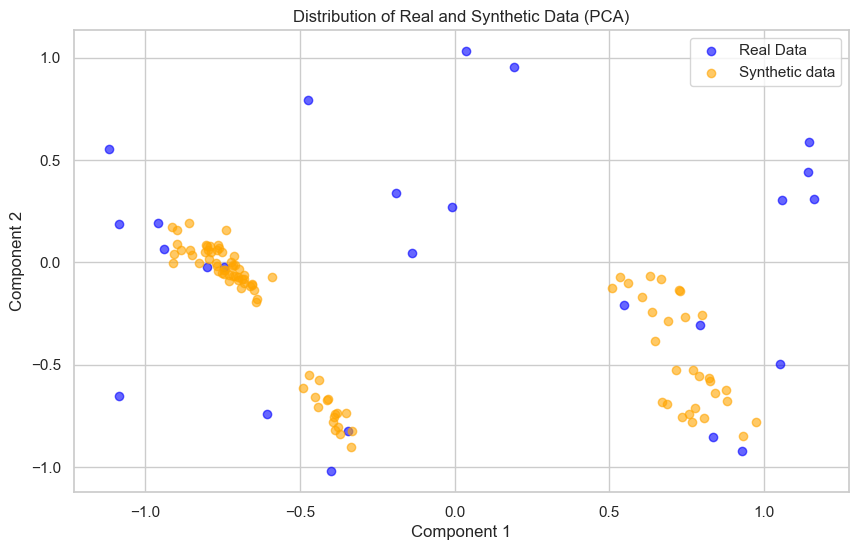

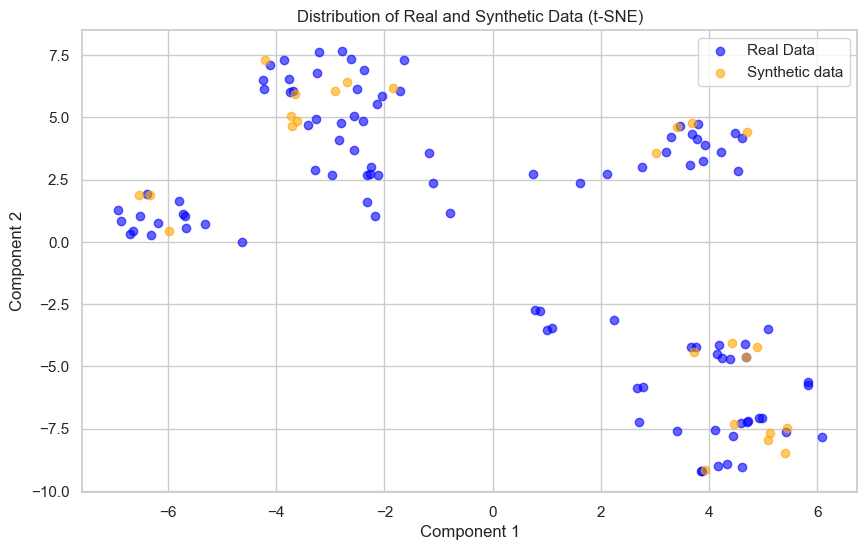

In [45]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Gerçek ve sentetik veri setlerini birleştirelim
real_data_sample = real_data[:100].cpu().numpy()  # Gerçek veriyi CPU'ya aktar ve NumPy dizisine çevir
generated_data_sample = generated_data[:100]  # Sentetik veri zaten NumPy dizisi

# PCA ile boyut azaltma
pca = PCA(n_components=2)
real_data_pca = pca.fit_transform(real_data_sample)
generated_data_pca = pca.transform(generated_data_sample)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.scatter(real_data_pca[:, 0], real_data_pca[:, 1], label="Real Data", alpha=0.6, color="blue")
plt.scatter(generated_data_pca[:, 0], generated_data_pca[:, 1], label="Synthetic data", alpha=0.6, color="orange")
plt.title("Distribution of Real and Synthetic Data (PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Alternatif: t-SNE ile görselleştirme
tsne = TSNE(n_components=2, random_state=42)
combined_data = np.vstack((real_data_sample, generated_data_sample))
combined_tsne = tsne.fit_transform(combined_data)

plt.figure(figsize=(10, 6))
plt.scatter(combined_tsne[:100, 0], combined_tsne[:100, 1], label="Real Data", alpha=0.6, color="blue")
plt.scatter(combined_tsne[100:, 0], combined_tsne[100:, 1], label="Synthetic data", alpha=0.6, color="orange")
plt.title("Distribution of Real and Synthetic Data (t-SNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
from scipy.stats import ks_2samp

# KS testi
ks_stat, ks_p_value = ks_2samp(real_data_sample.flatten(), generated_data_sample.flatten())
print(f"K-S Test Statistic: {ks_stat}, p-value: {ks_p_value}")

# Yorum:
if ks_p_value > 0.05:
    print("Gerçek ve sentetik veri aynı dağılımdan geliyor olabilir.")
else:
    print("Gerçek ve sentetik veri farklı dağılımlara sahip.")


K-S Test Statistic: 0.38089285714285714, p-value: 1.0839672096814047e-145
Gerçek ve sentetik veri farklı dağılımlara sahip.


In [38]:
# K-L Divergence veya Jensen-Shannon Divergence (JSD)

"""

JSD Değerinin Yorumu:
Aralık: JSD'nin değeri her zaman 0 ile 1 arasında olur.
0: İki dağılım tamamen aynıdır.
1: İki dağılım tamamen farklıdır.
Sonuçlar:
0.0331 gibi düşük bir değer, gerçek ve üretilen veri dağılımlarının oldukça benzer olduğunu gösterir.
Bu değer, üretilmiş verilerin gerçek verilere oldukça yakın olduğunu (istatistiksel olarak) gösterir. Özellikle 0.1'in altında bir JSD değeri genellikle iyi kabul edilir.
"""
from scipy.stats import entropy
import numpy as np


def calculate_jsd(real_data, generated_data, bins=50):
    """
    Jensen-Shannon Divergence hesaplama
    """
    # Histogramları oluştur
    real_hist, bin_edges = np.histogram(real_data, bins=bins, density=True)
    generated_hist, _ = np.histogram(generated_data, bins=bin_edges, density=True)

    # Normalize et
    real_hist = real_hist / np.sum(real_hist)
    generated_hist = generated_hist / np.sum(generated_hist)

    # Ortalamayı al
    m = 0.5 * (real_hist + generated_hist)

    # Kullandığımız ölçüm entropi
    jsd = 0.5 * (entropy(real_hist, m) + entropy(generated_hist, m))
    return jsd

# Gerçek ve sentetik veriyi test et
jsd_score = calculate_jsd(real_data_sample.flatten(), generated_data_sample.flatten())
print(f"Jensen-Shannon Divergence (JSD): {jsd_score}")


Jensen-Shannon Divergence (JSD): 0.03319343052413834


In [39]:
# Classifier-Based Evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Gerçek ve sentetik veriler için etiketler
real_labels = np.zeros(real_data_sample.shape[0])  # 0: Gerçek veri
gen_labels = np.ones(generated_data_sample.shape[0])  # 1: Sentetik veri

# Verileri ve etiketleri birleştir
X = np.vstack((real_data_sample, generated_data_sample))
y = np.hstack((real_labels, gen_labels))

# Veriyi karıştır
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Eğitim ve test setine ayır
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sınıflandırıcı eğit
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Performansı değerlendirme
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

